# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ (pandas, numpy, etc)

## numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_pred = np.array([0.9, 0.2, 0.1, 0.4, 0.9])
y_ans = np.array([1, 0, 0, 1, 1])

### 1. $L_1$ –Ω–æ—Ä–º–∞
–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –¥–ª—è –¥–≤—É—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤—ã—á–∏—Å–ª—è–µ—Ç –∏—Ö $L_1$ –Ω–æ—Ä–º—É ("–º–∞–Ω—Ö—ç—Ç—Ç–µ–Ω—Å–∫–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ" –∏–ª–∏ "—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≥–æ—Ä–æ–¥—Å–∫–∏—Ö –∫–≤–∞—Ä—Ç–∞–ª–æ–≤"):
$$\begin{align*} & L_1(y_{pred}, y) = \sum_{i=0}^m|y^{(i)} - y_{pred}^{(i)}| \end{align*}$$  

In [2]:
def L1_norm(y_pred, y_ans):
    if len(y_pred) == len(y_ans): return sum([abs(y_ans[i] - y_pred[i]) for i in range(len(y_pred))])
    else: return None
assert round(L1_norm(y_pred, y_ans), 1) == 1.1, '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

In [3]:
print(f"L1 = {L1_norm(y_pred, y_ans)}")

L1 = 1.1


### 2. $L_2$ –Ω–æ—Ä–º–∞
–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –¥–ª—è –¥–≤—É—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤—ã—á–∏—Å–ª—è–µ—Ç –∏—Ö $L_2$ –Ω–æ—Ä–º—É (–µ–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ):
$$\begin{align*} & L_2(y_{pred},y) = \sum_{i=0}^m(y^{(i)} - y_{pred}^{(i)})^2 \end{align*}$$

In [4]:
def L2_norm(y_pred, y_ans):
    if len(y_pred) == len(y_ans): return sum([(y_ans[i] - y_pred[i])**2 for i in range(len(y_pred))])
    else: return None
assert round(L2_norm(y_pred, y_ans), 3) == 0.43, '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

In [5]:
print(f"L2 = {L2_norm(y_pred, y_ans)}") 

L2 = 0.43


### 3. –°—Ç—Ä–æ–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –¥–ª—è 2-–º–µ—Ä–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—Å–µ —Å—Ç—Ä–æ–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (–Ω–∞–ø—Ä. [2, 2, 2, 2])

In [6]:
np.random.seed(777)
Z = np.random.randint(0, 5, (6, 5))
Z_eq = np.array((np.ones(5), np.zeros(5)))
Z = np.vstack((Z, Z_eq))
print(Z)

[[3. 1. 4. 1. 2.]
 [0. 2. 0. 3. 1.]
 [2. 4. 1. 3. 2.]
 [2. 2. 4. 0. 2.]
 [2. 4. 0. 0. 0.]
 [3. 2. 2. 0. 3.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


In [7]:
def all_the_same(X):
    return [row for row in X if len(set(row)) == 1]

In [8]:
print("–°—Ç—Ä–æ–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏:\n", all_the_same(Z))

–°—Ç—Ä–æ–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏:
 [array([1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0.])]


## pandas

__–ü—Ä–æ—á–∏—Ç–∞–π—Ç–µ "telecom_churn.csv" –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º__

In [9]:
df = pd.read_csv('telecom_churn.csv')

__–í—ã–≤–µ–¥–∏—Ç–µ –ø–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫__

In [10]:
df.head(10)

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   
5     3000030    No           38.05           682.0                  52.0   
6     3000038    No           31.66            26.0                  30.0   
7     3000042    No           62.13            98.0                  66.0   
8     3000046    No           35.30            24.0                  35.0   
9     3000050    No           81.00          1056.0                  75.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   
5                   0.25             0.0           0.0              148.0   
6                   0.25             0.0           0.0               60.0   
7                   2.48             0.0           0.0               24.0   
8                   0.00             0.0           0.0               20.0   
9                   0.00             0.0           0.0               43.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   
5                -3.1  ...                          0            1   
6                 4.0  ...                          0            9   
7                 6.8  ...                          0            6   
8                -0.3  ...                          0            9   
9                 2.4  ...                          0            5   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   
5              No                          1            30   
6              No                          1            30   
7              No                          0            30   
8              No                          0            80   
9              No                          1            30   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   
5                       No        3-Good      Other         Other   
6                       No     1-Highest      Other          Self   
7                       No     1-Highest      Other  Professional   
8                       No     1-Highest      Other         Other   
9                       No        3-Good      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No 

__–í—ã–≤–µ–¥–∏—Ç–µ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∏ –∫–æ–ª–æ–Ω–æ–∫ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ__

In [11]:
print(df.shape)

(51047, 58)


__–í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞–∑–≤–∞–Ω–∏—è –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–æ–∫__

In [12]:
print(df.columns)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

__–ü–æ–∫–∞–∂–∏—Ç–µ –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–ª—è UniqueSubs –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞__

In [13]:
print(df['UniqueSubs'].value_counts())

UniqueSubs
1      32109
2      13852
3       3212
4       1219
5        421
6        147
7         49
9         12
8         10
10         6
11         3
12         3
13         2
18         1
196        1
Name: count, dtype: int64


__–°–≥—Ä—É–ø–ø–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –ø–æ–ª—é MaritalStatus –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –¥–ª—è InboundCalls –∏ OutboundCalls (–æ—Ç–≤–µ—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –≤ –≤–∏–¥–µ —Ç–∞–±–ª–∏—Ü—ã)__

In [14]:
df.groupby('MaritalStatus')[['InboundCalls', 'OutboundCalls']].mean()

InboundCalls  OutboundCalls
MaritalStatus                             
No                 8.620920      27.108688
Unknown            9.868609      29.655690
Yes                6.091089      19.680832

# –°–∞–º–∞ –ª–∞–±–∞

__–°—á–∏—Ç–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏ –≤—ã–≤–µ–¥–µ—Ç–µ –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞ (tips.csv)__

In [15]:
df = pd.read_csv('tips.csv')
df.head(5)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

__–ü–æ–∫–∞–∂–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ —á–∞–µ–≤—ã—Ö –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ –∏ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ —ç—Ç–æ –ø–æ –ø–æ–ª–∞–º__

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å _catplot_

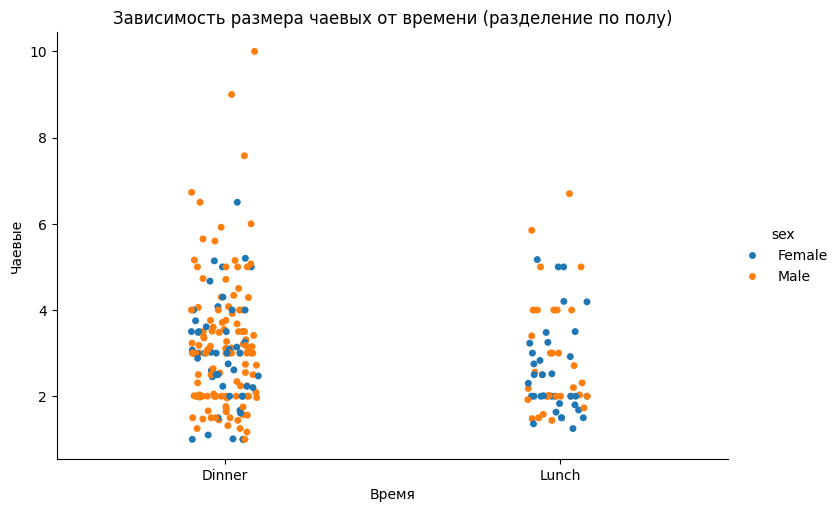

In [16]:
sns.catplot(
    data=df, 
    x="time", 
    y="tip", 
    hue="sex", 
    kind="strip",
    aspect=1.5
)

plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–ß–∞–µ–≤—ã–µ')
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ —á–∞–µ–≤—ã—Ö –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É)")
plt.show()

__–ü–æ–∫–∞–∂–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ —á–∞–µ–≤—ã—Ö –æ—Ç –ø–æ–ª–Ω–æ–≥–æ —Å—á–µ—Ç–∞ –∏ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ —ç—Ç–æ –ø–æ –ø–æ–ª–∞–º__

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å _lineplot_

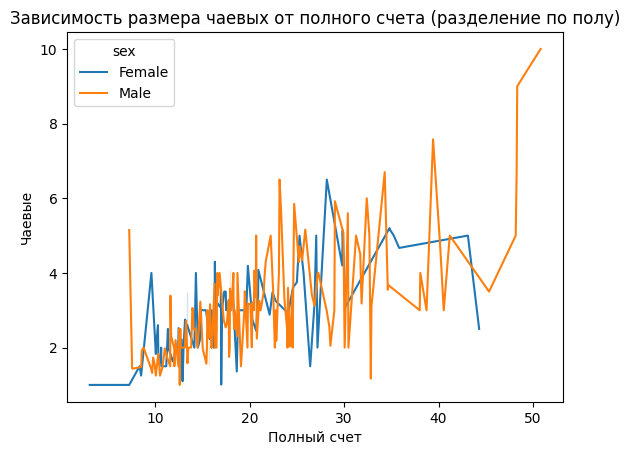

In [17]:
sns.lineplot(
    data=df,
    x="total_bill",
    y="tip",
    hue="sex"
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ —á–∞–µ–≤—ã—Ö –æ—Ç –ø–æ–ª–Ω–æ–≥–æ —Å—á–µ—Ç–∞ (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É)")
plt.xlabel("–ü–æ–ª–Ω—ã–π —Å—á–µ—Ç")
plt.ylabel("–ß–∞–µ–≤—ã–µ")
plt.show()

In [18]:
#–ü—Ä–æ—Å—Ç–æ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ
X_1 = df.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
X_2 = df.drop(['total_bill', 'size', 'tip'], axis=1)
y = np.array(df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1).values)
X_2_clear = pd.get_dummies(X_2)
X = np.array(pd.concat([X_1,X_2_clear], axis=1).values)
print(X)

[[16.99 2 True ... False True False]
 [10.34 3 False ... False True False]
 [21.01 3 False ... False True False]
 ...
 [22.67 2 False ... False True False]
 [17.82 2 False ... False True False]
 [18.78 2 True ... True True False]]


In [19]:
#–ü—Ä–æ—Å—Ç–æ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ
features = pd.concat([X_1, X_2_clear], axis=1)
target = df.drop(['sex', 'total_bill', 'smoker', 'day', 'time', 'size'], axis=1)
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size = 0.3, random_state=0)

<font size=3 >__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–ú—ã —Ä–∞–∑–±–µ—Ä–µ–º __–æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—ã –ø–æ—Ç–µ—Ä—å__ –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –î–∞–ª–µ–µ –≤—Å–µ –±—É–¥–µ–º –Ω–∞–∑—ã–≤–∞—Ç—å __–º–µ—Ç—Ä–∏–∫–∞–º–∏__.

__–ú–µ—Ç—Ä–∏–∫–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã –¥–ª—è:__
- –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è
- –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏
- —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
- –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤



<table border="1" width="100%">
 <tr>
    <td width="50%"> 
        <p> <font size=3> $MAE= \frac{1}{n} \sum_{i=1}^n |y_i-\hat{y_i}|$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –ª–µ–≥–∫–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –µ–¥–∏–Ω–∏—Ü—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ç–∞—Ä–≥–µ—Ç–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ ‚Äì —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞ –≤ —Ç–∞–∫–æ–º –≤–∏–¥–µ 
            </font>
        </p><br/>
        <p> <font size=3> $MSE= \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                —Å–ª–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font><br/>
        </p><br/>
        <p> <font size=3> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2} $  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –µ—â–µ —Å–ª–æ–∂–Ω–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font>
        <p>–û—Å–Ω–æ–≤–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ $RMSE$ –∏ $MAE$ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è $RMSE$ —Å—Ä–µ–º–∏—Ç—å—Å—è –∫ —Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–µ, –∞  $MAE$ –∫ –º–µ–¥–∏–∞–Ω–µ</p><br/><p>$y$ $-$ –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ; $\hat{y}$ $-$ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ</p>
        </p><br/>
     </td>
    <td><img src="./errors_2.png" align="right"></td>
 </tr>
</table>

–î–≤–µ –ø–æ–ø—ã—Ç–∫–∏ __–æ–±—ä–µ–¥–∏–Ω–∏—Ç—å__ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ __—Å–≤–æ–π—Å—Ç–≤–∞ –º–µ—Ç—Ä–∏–∫__:
- [–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –•—å—é–±–µ—Ä–∞](https://en.wikipedia.org/wiki/Huber_loss): 
    * –≤–µ–¥–µ—Ç —Å–µ–±—è –∫–∞–∫ $MSE$ –Ω–∞ –æ—à–∏–±–∫–∞—Ö –º–µ–Ω—å—à–µ $\sigma$ –∏ –∫–∞–∫ $MAE$ –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ. __–ß—Ç–æ –Ω–µ –¥–∞–µ—Ç "–≤–∑—Ä—ã–≤–∞—Ç—å—Å—è" –º–µ—Ç—Ä–∏–∫–µ –Ω–∞ –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∏ "–∂–µ—Å—Ç–∫–æ" —Ä–µ–∞–≥–∏—Ä—É–µ—Ç –Ω–∞ –º–∞–ª–µ–Ω—å–∫–∏–µ –æ—Å—Ç–∞—Ç–∫–∏__
    * –≤—Å–µ —Ç–∞–∫ –∂–µ –Ω–µ —É–¥–æ–±–Ω–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞—Ç—å
- [Log-Cosh Loss](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0):
    * –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –º–µ–Ω—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å –•—å—é–±–µ—Ä–∞ –Ω–∞ –≤—Å–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ
    * __–¥–≤–∞–∂–¥—ã –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞__, —á—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –º–µ—Ç–æ–¥–∞—Ö —á–∏—Å–ª–µ–Ω–Ω–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.
________________________
__–ü—Ä–æ–±–ª–µ–º–∞:__ –≤—Å–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏ __–Ω–µ –ø–æ–¥—Ö–æ–¥—è—Ç –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è__ –∞ —Ç–æ–ª—å–∫–æ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π, —á—Ç–æ —Å–ª–µ–¥—É–µ—Ç –∏–∑ —Ç–æ–≥–æ —á—Ç–æ __—Ñ—É–Ω–∫—Ü–∏–∏ –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω—ã —Å–≤–µ—Ä—Ö—É.__ 

–≠—Ç–∞ –ø—Ä–æ–±–ª–µ–º–∞ —Ç–∞–∫ –∂–µ —Ä–µ—à–∞–µ—Ç—Å—è –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º –¥–æ—Ä–∞–±–æ—Ç–æ–∫ $MAE$: [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) –∏ [SMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error). –û–¥–Ω–∞–∫–æ, –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–µ—Ç—Ä–∏–∫—É $R^2$
–∏ –º–æ—Ç–∏–≤—ã –ø–æ—è–≤–ª–µ–Ω–∏—è $R^2_{adj}$.

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y_i})^2}$$

–î–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –æ–±–ª–∞–¥–∞–µ—Ç —Å–ª–µ–¥—É—é—â–∏–º–∏ —Å–≤–æ–π—Å—Ç–≤–∞–º–∏:

<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É –∏ —Å–Ω–∏–∑—É, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–∞—Ç—å –æ—Ü–µ–Ω–∫—É –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É —Ä–µ—à–µ–Ω–∏—é –±–µ–∑ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å –¥—Ä—É–≥–∏–º–∏
</font><br/>
<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     —Ö–æ—Ä–æ—à–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ—Ç—Å—è: –Ω–∞ —Å–∫–æ–ª—å–∫–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –ª—É—á—à–µ, —á–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     –Ω–µ –¥–∏—Ñ—Ñ–∏—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å—Ç–µ—Ç (–Ω–µ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è) –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –Ω–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –¥–∞–∂–µ –µ—Å–ª–∏ –æ–Ω–∏ –Ω–∏–∫–∞–∫ –Ω–µ –æ–±—ä—è—Å–Ω—è—é—Ç —Ü–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –ü–æ—ç—Ç–æ–º—É –Ω–µ–ª—å–∑—è —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ —Å —Ä–∞–∑–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –î–∞–Ω–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ —Ä–µ—à–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é $R^2_{adj}$
</font>

$$R^2_{adj}=1-(1-R^2)\frac{n-1}{n-p-1}$$

–≥–¥–µ $p -$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ $n -$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤

__–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:__ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å $R^2_{adj}$ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –∏ –æ—Ü–µ–Ω–∫–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∞ $R^2$ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ –Ω–æ–≤—ã—Ö –æ–±—ä–µ–∫—Ç–∞—Ö


__–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å 4 –æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏:__ $MAE; MSE; RMSE; R^2$

–ö–∞–∂–¥–∞—è –∏–∑ –º–µ—Ç—Ä–∏–∫ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ 2 –æ–¥–Ω–æ–º–µ—Ä–Ω—ã—Ö numpy –º–∞—Å—Å–∏–≤–∞:
- __y_true__ - –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 
- __y_predict__ - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

–ö–∞–∂–¥–∞—è –∏–∑ —Ñ—É–Ω–∫—Ü–∏–π –¥–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—à–∞—Ç—å –æ–¥–Ω–æ —á–∏—Å–ª–æ 



In [20]:
def MAError(y_true, y_predict):
    # –°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞
    error = np.mean(np.abs(y_true - y_predict))
    return error

def MSError(y_true, y_predict):
    # –°—Ä–µ–¥–Ω—è—è –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞
    error = np.mean((y_true - y_predict) ** 2)
    return error

def RMSError(y_true, y_predict):
    # –ö–æ—Ä–µ–Ω—å –∏–∑ —Å—Ä–µ–¥–Ω–µ–π –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏
    error = np.sqrt(MSError(y_true, y_predict))
    return error

def R_square(y_true, y_predict):
    # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ (R^2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_predict) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def all_metric(y_true, y_predict):
    d = {}
    d['MAE'] = [MAError(y_true, y_predict)] 
    d['MSE'] = [MSError(y_true, y_predict)] 
    d['RMSE'] = [RMSError(y_true, y_predict)]
    d['R_square'] = [R_square(y_true, y_predict)]
    return d

__–û–±—É—á–∏–º –º–æ–¥–µ–ª—å –∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ñ—É–Ω–∫—Ü–∏–π –æ—à–∏–±–æ–∫__

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
model = LogisticRegression(max_iter=5000)
features, target = load_diabetes(return_X_y=True, as_frame=True)
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(features)

full = pd.concat([features, target], axis=1)

full_train, full_test = train_test_split(full, test_size=0.2, random_state=42, shuffle=True)

y_train = full_train.target
X_train = full_train.drop("target", axis=1)

In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [25]:
X_test = full_test.drop("target", axis=1)
y_test = full_test.target

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
assert round(MAError(y_true=y_test, y_predict=y_pred), 3) == round(mean_absolute_error(y_test, y_pred), 3), '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

assert round(MSError(y_true=y_test, y_predict=y_pred), 3) == round(mean_squared_error(y_test, y_pred), 3), '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

assert round(RMSError(y_true=y_test, y_predict=y_pred), 3) == round(mean_squared_error(y_test, y_pred, squared=False), 3), '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

assert round(R_square(y_true=y_test, y_predict=y_pred), 3) == round(r2_score(y_test, y_pred), 3), '–ù–µ–≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

/home/ttsypyshev/data/education/5 term/operational data analysis/lab 6/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è - –æ–¥–∏–Ω –∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ —Ö–æ—Ä–æ—à–æ –∏–∑—É—á–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –ø–æ–∑–≤–æ–ª—è—é—â–∏–π –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –≤–∏–¥–µ –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø—Ä–æ—á–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ - –≤–µ—Å–∞–º–∏ –º–æ–¥–µ–ª–∏. –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ (–≤ —Å–º—ã—Å–ª–µ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ—Å—Ç–∏ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏) –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏ —Å –ø–æ–º–æ—â—å—é –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è –∏–ª–∏ —á–∏—Å–ª–µ–Ω–Ω–æ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.  

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –ø—Ä–æ—Å—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∫–∞—á–µ—Å—Ç–≤–∞ - —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É. –ú—ã –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –≤—ã–±–æ—Ä–∫–æ–π, —Å–æ–¥–µ—Ä–∂–∞—â–µ–π 3 –ø—Ä–∏–∑–Ω–∞–∫–∞. –î–ª—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–≤–µ—Å–æ–≤) –º–æ–¥–µ–ª–∏ —Ä–µ—à–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∞—è –∑–∞–¥–∞—á–∞:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
–≥–¥–µ $x_{i1}, x_{i2}, x_{i3}$ - –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ $i$-–≥–æ –æ–±—ä–µ–∫—Ç–∞, $y_i$ - –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ $i$-–≥–æ –æ–±—ä–µ–∫—Ç–∞, $\ell$ - —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.

–ù–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –≤–µ—Å–æ–≤ $w$ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–æ –∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏.
–ú—ã —Ö–æ—Ç–∏–º –Ω–∞–π—Ç–∏ —Ç–∞–∫–æ–π –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ $w$, —á—Ç–æ–±—ã –≤–µ–∫—Ç–æ—Ä $y$, –ø—Ä–∏–±–ª–∏–∂–∞—é—â–∏–π —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ–ª—É—á–∞–ª—Å—è —É–º–Ω–æ–∂–µ–Ω–∏–µ–º –º–∞—Ç—Ä–∏—Ü—ã $X$ (—Å–æ—Å—Ç–æ—è—â–µ–π –∏–∑ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–∫—Ç–æ–≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤–æ–≥–æ) –Ω–∞ –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ $w$. –¢–æ –µ—Å—Ç—å, —á—Ç–æ–±—ã –≤—ã–ø–æ–ª–Ω—è–ª–æ—Å—å –º–∞—Ç—Ä–∏—á–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ:
$$\Large y = Xw$$
–î–æ–º–Ω–æ–∂–µ–Ω–∏–µ–º —Å–ª–µ–≤–∞ –Ω–∞ $X^T$ –ø–æ–ª—É—á–∞–µ–º:
$$\Large X^Ty = X^TXw$$
–≠—Ç–æ —Ö–æ—Ä–æ—à–æ, –ø–æ—Å–∫–æ–ª—å–∫—É —Ç–µ–ø–µ—Ä—å –º–∞—Ç—Ä–∏—Ü–∞ $X^TX$ - –∫–≤–∞–¥—Ä–∞—Ç–Ω–∞—è, –∏ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ —Ä–µ—à–µ–Ω–∏–µ (–≤–µ–∫—Ç–æ—Ä $w$) –≤ –≤–∏–¥–µ:
$$\Large w = {(X^TX)}^{-1}X^Ty$$


–ù–æ –≤—Å–µ –∂–µ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –¥–ª—è –±–æ–ª—å—à–∏—Ö –º–∞—Ç—Ä–∏—Ü $X$ –±—ã—Å—Ç—Ä–µ–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫, –æ—Å–æ–±–µ–Ω–Ω–æ –µ–≥–æ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∞—è –≤–µ—Ä—Å–∏—è.

__–†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏–∏__
1. __normal_equation__, –∫–æ—Ç–æ—Ä–∞—è –ø–æ –∑–∞–¥–∞–Ω–Ω—ã–º –º–∞—Ç—Ä–∏—Ü–∞–º (–º–∞—Å—Å–∏–≤–∞–º NumPy) X* –∏ *y –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤  ùë§  —Å–æ–≥–ª–∞—Å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —É—Ä–∞–≤–Ω–µ–Ω–∏—é –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

2. __linear_prediction__, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –º–∞—Ç—Ä–∏—Ü—É X* –∏ –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ *w, –∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤–µ–∫—Ç–æ—Ä –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ –≤ –≤–∏–¥–µ –ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Å—Ç–æ–ª–±—Ü–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã X* —Å –≤–µ—Å–∞–º–∏ *w.

In [29]:
def normal_equation(X, y):
    X = X.astype(np.float64)
    y = y.astype(np.float64)

    # X = np.c_[np.ones(X.shape[0]), X]

    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def linear_prediction(X, w):
    # X = np.c_[np.ones(X.shape[0]), X]
    
    ans = X @ w
    return ans


norm_eq_weights = normal_equation(train_data, train_target)
print(norm_eq_weights)

             tip
0  -2.613954e-01
1   2.099085e+01
2  -3.113428e+14
3  -3.113428e+14
4   1.141590e+15
5   1.141590e+15
6  -8.302475e+14
7  -8.302475e+14
8  -8.302475e+14
9  -8.302475e+14
10 -3.578625e+01
11 -1.827563e+01


In [30]:
tip_pred = MSError(test_target.to_numpy(), linear_prediction(test_data.to_numpy(), norm_eq_weights))
print(tip_pred)

assert round(MSError(test_target.to_numpy(), linear_prediction(test_data.to_numpy(), norm_eq_weights)), 3) <= 62.253, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'

1234.5433343010982


AssertionError: –ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç

In [31]:
# –ü—Ä–æ—Å—Ç–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å
LinReg = LinearRegression()
LinReg.fit(train_data, train_target)
ans1 = LinReg.predict(test_data)

In [32]:
# –ü—Ä–æ—Å—Ç–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å
mean_squared_error(test_target, ans1)

np.float64(0.9550808988617137)